In [1]:
import os
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


def find_floor(x):
    if "Ground" in x:
        return 0
    if "Upper" in x:
        return -1
    if "Lower" in x:
        return -2
    return int(x.split()[0])

def find_floors(x): 
    x = x.split()
    if x[-1] == "Ground":
        return 0
    return int(x[-1])

path = os.path.join(os.getcwd(), "House_Rent_Dataset.csv")
print("PATH: " + path)
dataset = pandas.read_csv(path)

X = dataset.drop(["Rent"], axis=1)
y = dataset.take([2], axis=1)

X["Posted On"] = X["Posted On"].apply(lambda x: (datetime.now() - datetime.strptime(x, "%Y-%m-%d")).days)
floor = X["Floor"].apply(find_floor)
floors = X["Floor"].apply(find_floors)
X["Floor"] = floor
X["Floors"] = floors
X["Area Type"] = X["Area Type"].factorize()[0]
X["Area Locality"] = X["Area Locality"].factorize()[0]
X["City"] = X["City"].factorize()[0]
X["Furnishing Status"] = X["Furnishing Status"].factorize()[0]
X["Tenant Preferred"] = X["Tenant Preferred"].factorize()[0]
X["Point of Contact"] = X["Point of Contact"].factorize()[0]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=41)

#model = LinearRegression() # 0.25 -> 0.50
#model = DecisionTreeClassifier(max_depth=100) # 0.99 -> 0.06
#model = RandomForestClassifier(max_depth=10) # 0.78 -> 0.09

#model.fit(X_train, y_train.values.ravel())

#train_score = model.score(X_train, y_train)
#test_score = model.score(X_test, y_test)

#print(train_score)
#print(test_score)


PATH: d:\school\ML\Exercises\Kaggle\Housing\House_Rent_Dataset.csv


In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.10.0'

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(12,)),
    tf.keras.layers.Dense(24, activation="relu"),
    tf.keras.layers.Dense(24, activation="relu"),
    tf.keras.layers.Dense(1),
])

In [5]:
model.compile(optimizer="adam", loss='mse', metrics=['mse'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12)                0         
                                                                 
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 937
Trainable params: 937
Non-trainable params: 0
_________________________________________________________________


In [60]:
tf.keras.backend.clear_session()
hist = model.fit(X_train, y_train, batch_size=24, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
89/89 [==============================] - 1s 6ms/step - loss: 9879418880.0000 - mse: 9879418880.0000 - val_loss: 5960654336.0000 - val_mse: 5960654336.0000
Epoch 2/100
89/89 [==============================] - 0s 3ms/step - loss: 9071812608.0000 - mse: 9071812608.0000 - val_loss: 4675564544.0000 - val_mse: 4675564544.0000
Epoch 3/100
89/89 [==============================] - 0s 3ms/step - loss: 8301277184.0000 - mse: 8301277184.0000 - val_loss: 4062313472.0000 - val_mse: 4062313472.0000
Epoch 4/100
89/89 [==============================] - 0s 3ms/step - loss: 7885864960.0000 - mse: 7885864960.0000 - val_loss: 3646854912.0000 - val_mse: 3646854912.0000
Epoch 5/100
89/89 [==============================] - 0s 3ms/step - loss: 7554608128.0000 - mse: 7554608128.0000 - val_loss: 3265214720.0000 - val_mse: 3265214720.0000
Epoch 6/100
89/89 [==============================] - 0s 4ms/step - loss: 7370334208.0000 - mse: 7370334208.0000 - val_loss: 3060115200.0000 - val_mse: 3060115200.000

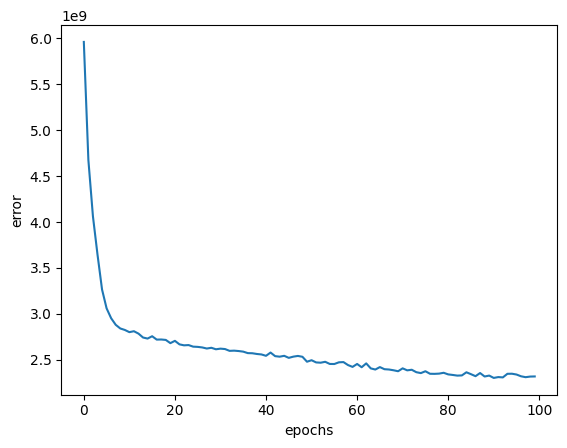

In [62]:
from matplotlib import pyplot

pyplot.xlabel("epochs")
pyplot.ylabel("error")
pyplot.plot(hist.history['val_loss'])

2/2 [==============================] - 0s 2ms/step


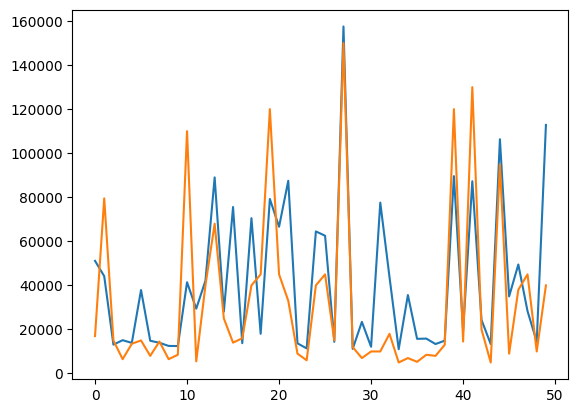

In [51]:
predictedRent = model.predict(X_train[:50])
actualRent = y_train[:50]
pyplot.plot(predictedRent)
pyplot.plot(actualRent.values)
